In [1]:
import os
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
host = os.environ.get('DB_HOST_DS4A')
db_name = os.environ.get('DB_NAME_DATATHON')
db_user = os.environ.get('DB_USER_DS4A')
db_password = os.environ.get('DB_PASS_DS4A')

In [3]:
connection_string = f'postgresql://{db_user}:{db_password}@{host}/{db_name}'
engine = create_engine(connection_string)

# Functions

In [4]:
def count_barplot(df, col):
    fig, ax = plt.subplots(figsize=(15,5))
    ax = sns.countplot(x=col, data=df, order=np.sort(df[col].unique()))

# Demographics

In [5]:
demographics = pd.read_sql('select * from demographics', 
                           engine.connect(), 
                           index_col='borough')

demographics.drop('id', axis=1, inplace=True)
demographics.head()

,population,total_income,area_squarekm,under_5_years,5-9_years,10-14_years,15-19_years,20-24_years,25-29_years,30-34_years,...,less_than_10000,10000_to_14999,15000_to_24999,25000_to_34999,35000_to_49999,50000_to_74999,75000_to_99999,100000_to_149999,150000_to_199999,200000_or_more
borough,,,,,,,,,,,,,,,,,,,,,
Bronx,1372111,66794139347,87.5152,102995,98538,99048,114344,110579,103829,96315,...,75525,45782,68197,53967,63301,72104,42686,38418,11715,7980
Brooklyn,2503518,168500006492,159.6480,177058,159285,156494,170623,195733,222691,202703,...,105868,64435,105583,90596,116024,146853,98214,107195,45358,45069
Manhattan,1584024,198983103829,51.2727,76555,61321,58226,77441,141450,186552,154291,...,71440,39207,62636,51331,64489,94112,73515,99567,56607,132185
Queens,2230286,163702982674,231.4290,132453,123751,123397,139078,160848,184896,177176,...,55668,36527,79695,72079,99299,140095,101834,114328,47029,33343
Staten Island,468730,42324993228,149.0380,28339,30015,30797,32929,31458,29988,29859,...,11241,6381,13051,11721,15934,25193,22729,31191,15978,11660


# Uber 

In [6]:
uber = pd.read_sql('uber_trips',
                   engine.connect(),
                   parse_dates='pickup_datetime',
                   columns=['pickup_datetime', 'affiliate_base', 'borough'])


uber['pickup_datetime'] = pd.to_datetime(uber['pickup_datetime'])
uber['month_year'] = pd.to_datetime(uber['pickup_datetime']).dt.to_period('M')
uber['pickup_hour'] = uber['pickup_datetime'].dt.hour
uber['pickup_weekday'] = uber['pickup_datetime'].dt.weekday
uber.set_index('pickup_datetime', inplace=True)

uber.head()

,affiliate_base,borough,month_year,pickup_hour,pickup_weekday
pickup_datetime,,,,,
2015-02-04 17:13:21,B02682,Manhattan,2015-02,17,2
2015-02-04 17:23:03,B02306,Manhattan,2015-02,17,2
2015-02-04 19:36:23,B02682,Manhattan,2015-02,19,2
2015-02-04 09:30:15,B02682,Manhattan,2015-02,9,2
2015-02-04 20:11:09,B02682,Manhattan,2015-02,20,2


In [7]:
uber.head()

,affiliate_base,borough,month_year,pickup_hour,pickup_weekday
pickup_datetime,,,,,
2015-02-04 17:13:21,B02682,Manhattan,2015-02,17,2
2015-02-04 17:23:03,B02306,Manhattan,2015-02,17,2
2015-02-04 19:36:23,B02682,Manhattan,2015-02,19,2
2015-02-04 09:30:15,B02682,Manhattan,2015-02,9,2
2015-02-04 20:11:09,B02682,Manhattan,2015-02,20,2


In [8]:
bad_trips = uber[uber['borough'] == 'Does not belong to any borough'].shape[0]
bad_trips_pct = bad_trips / uber.shape[0]
uber = uber[uber['borough'] != 'Does not belong to any borough']


print(f'There are {bad_trips} trips that does not belong to any borough. That is the {100* bad_trips_pct:.2f}%. \
We will ignore them.')

There are 122432 trips that does not belong to any borough. That is the 0.65%. We will ignore them.


We are ignoring all the trips that began outside of NY (for example, from New Jersey)

## Trips by month

In [9]:
uber.groupby('month_year').count()

,affiliate_base,borough,pickup_hour,pickup_weekday
month_year,,,,
2014-04,551259,551259,551259,551259
2014-05,636696,636696,636696,636696
2014-06,646174,646174,646174,646174
2014-07,774931,774931,774931,774931
2014-08,803730,803730,803730,803730
2014-09,999105,999105,999105,999105
2015-01,1873186,1953049,1953801,1953801
2015-02,2182040,2262719,2263620,2263620
2015-03,2259773,2258833,2259773,2259773


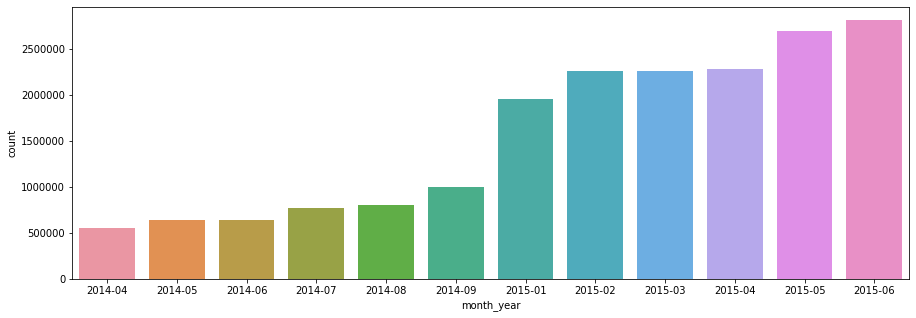

In [10]:
count_barplot(uber, 'month_year')

### By borough and month

In [19]:
uber_bor_m = pd.DataFrame(uber.groupby(['borough', 'month_year']).count()['affiliate_base'])
uber_bor_m.rename(columns={'affiliate_base': 'num_trips'}, inplace=True)
uber_bor_m.reset_index(inplace=True)

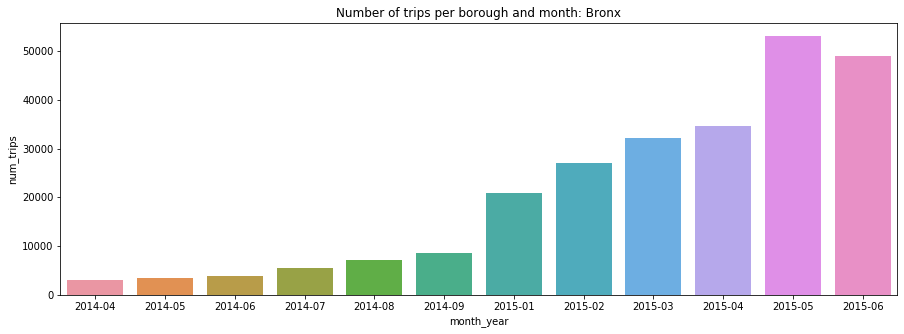

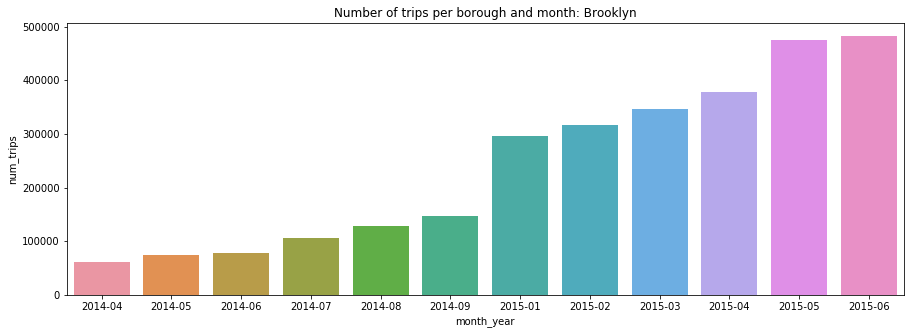

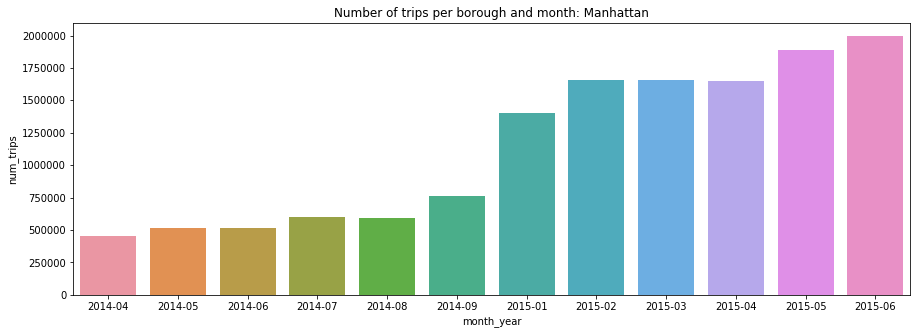

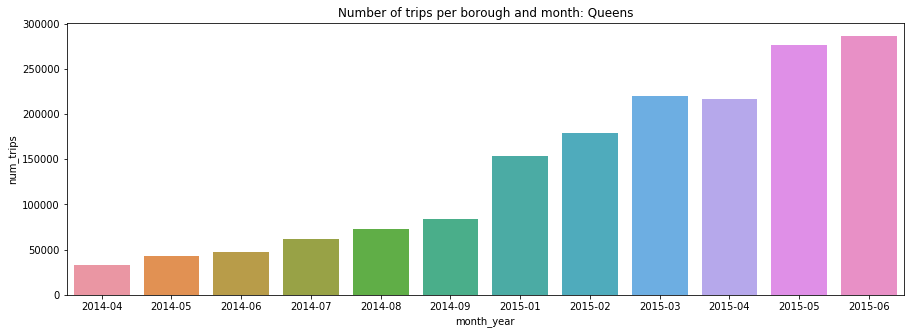

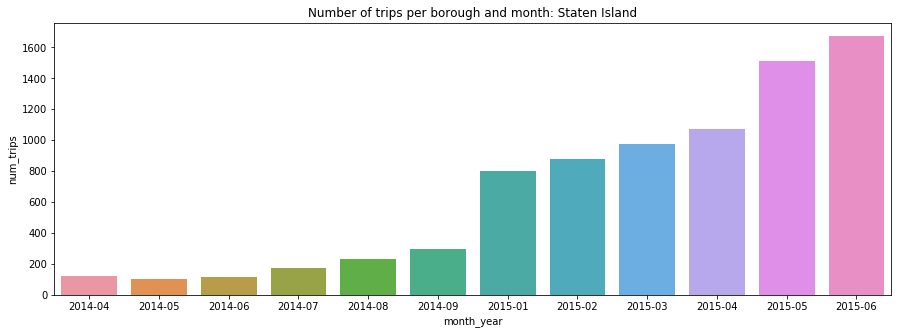

In [20]:
for bor in demographics.index:
    fig, ax = plt.subplots(sharey=True, figsize=(15,5), )
    sns.barplot(x='month_year', y='num_trips', data=uber_bor_m[uber_bor_m['borough'] == bor], ax = ax)
    plt.title(f'Number of trips per borough and month: {bor}')

## Trips by week day

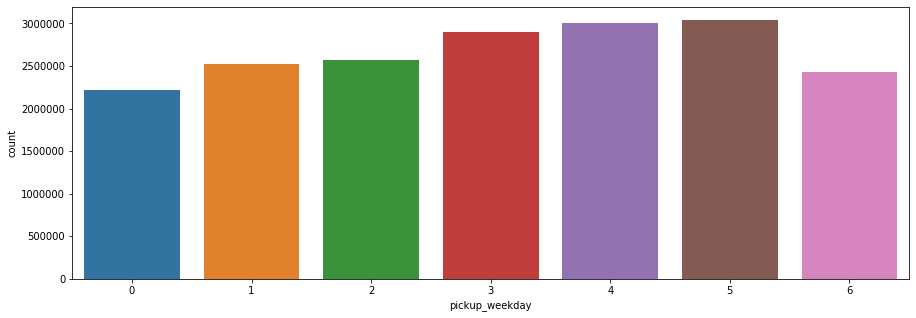

In [11]:
count_barplot(uber, 'pickup_weekday')

### By borough and week day

In [36]:
uber_bor_wd = pd.DataFrame(uber.groupby(['borough', 'pickup_weekday']).count()['affiliate_base'])
uber_bor_wd.rename(columns={'affiliate_base': 'num_trips'}, inplace=True)
uber_bor_wd.reset_index(inplace=True)

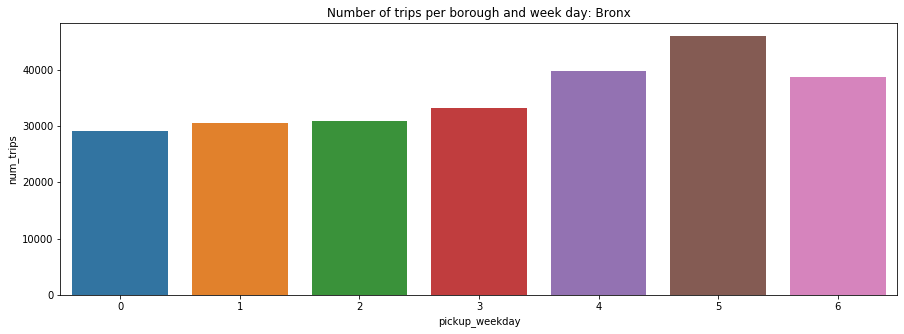

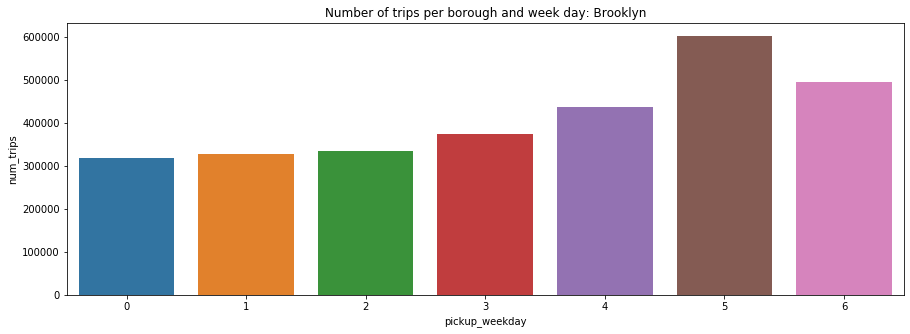

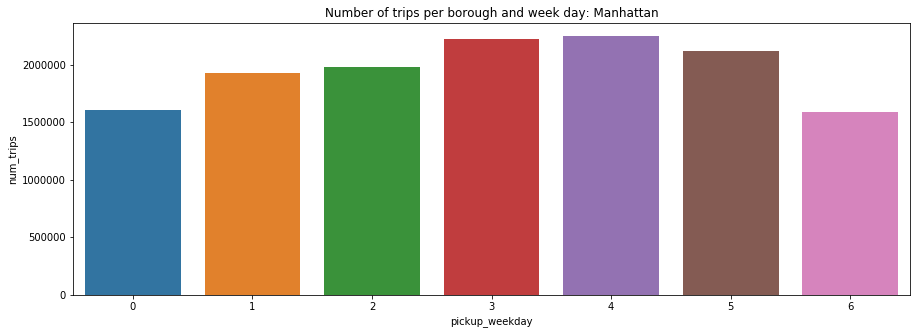

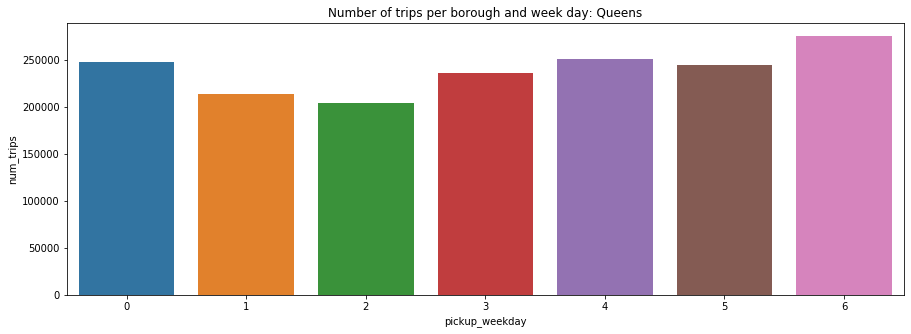

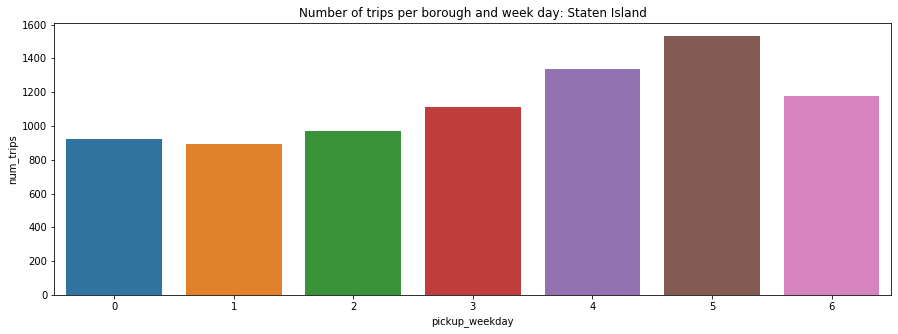

In [37]:
for bor in demographics.index:
    fig, ax = plt.subplots(sharey=True, figsize=(15,5), )
    sns.barplot(x='pickup_weekday', y='num_trips', data=uber_bor_wd[uber_bor_wd['borough'] == bor], ax = ax)
    plt.title(f'Number of trips per borough and week day: {bor}')

In [66]:
for bor in demographics.index:
    corr_mat = uber_bor_wd[uber_bor_wd['borough'] == bor].corr()
    print(bor)
    print('-'*50)
    print(corr_mat)
    print('\n')
print('Total')
print('-'*50)
print(uber_bor_wd.corr())
print('\n')

Bronx
--------------------------------------------------
                pickup_weekday  num_trips
pickup_weekday        1.000000   0.855001
num_trips             0.855001   1.000000


Brooklyn
--------------------------------------------------
                pickup_weekday  num_trips
pickup_weekday        1.000000   0.863949
num_trips             0.863949   1.000000


Manhattan
--------------------------------------------------
                pickup_weekday  num_trips
pickup_weekday        1.000000   0.167525
num_trips             0.167525   1.000000


Queens
--------------------------------------------------
                pickup_weekday  num_trips
pickup_weekday        1.000000   0.620686
num_trips             0.620686   1.000000


Staten Island
--------------------------------------------------
                pickup_weekday  num_trips
pickup_weekday        1.000000   0.793081
num_trips             0.793081   1.000000


Total
--------------------------------------------------
  

In some boroughs it seems that people use uber more often in weekends but in general there is not correlation between the weekday and the number of uber trips

## Trips by time 

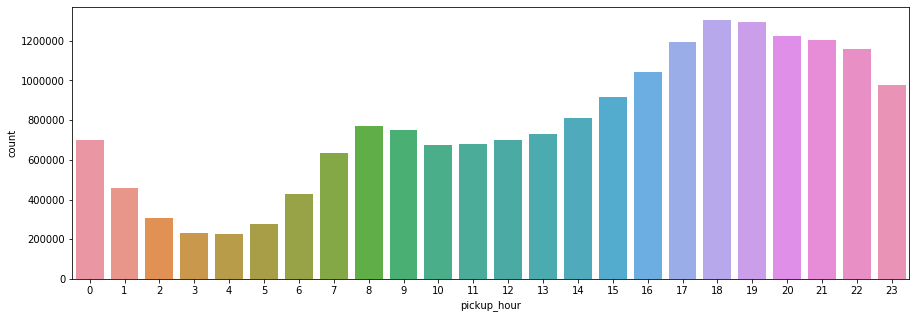

In [60]:
count_barplot(uber, 'pickup_hour')

In [62]:
uber_bor_h = pd.DataFrame(uber.groupby(['borough', 'pickup_hour']).count()['affiliate_base'])
uber_bor_h.rename(columns={'affiliate_base': 'num_trips'}, inplace=True)
uber_bor_h.reset_index(inplace=True)

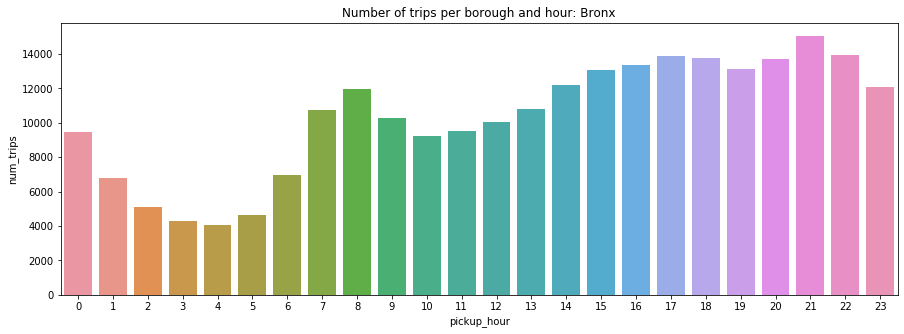

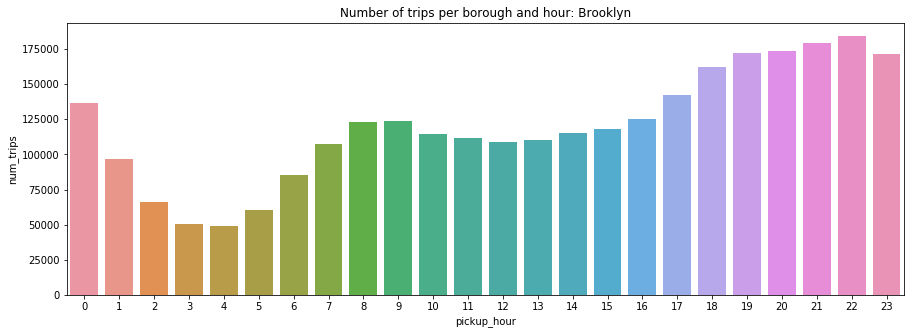

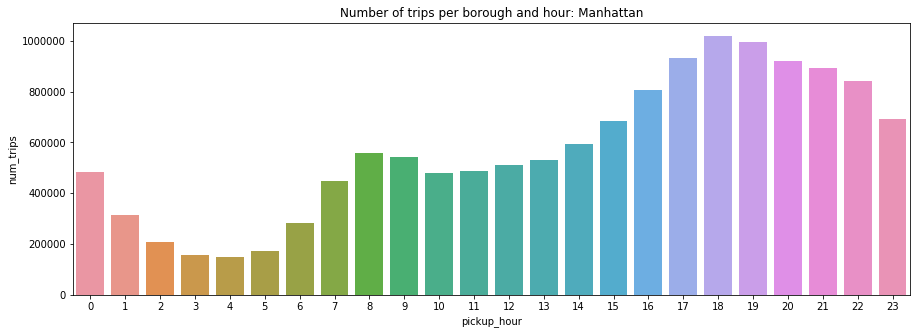

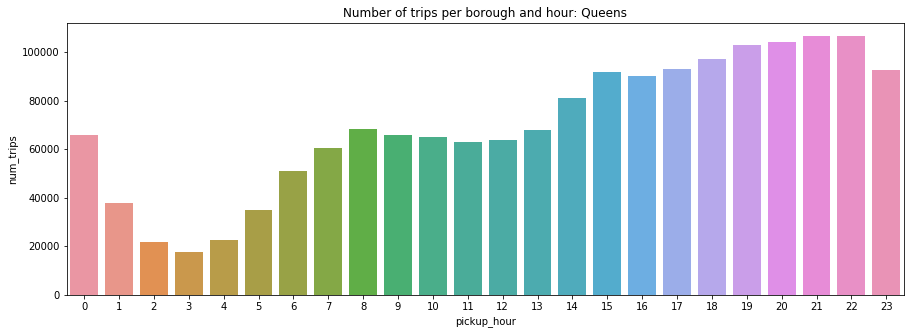

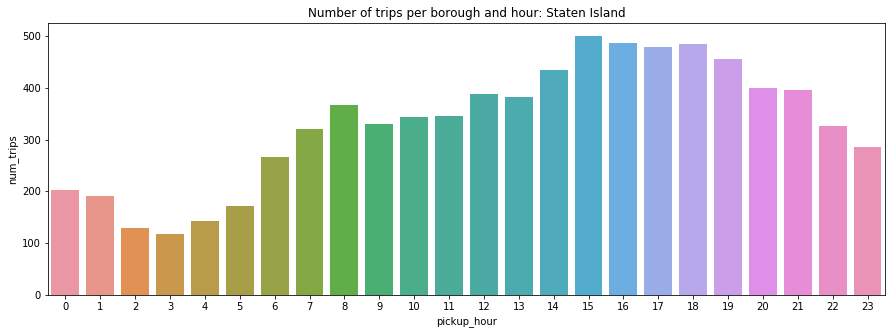

In [63]:
for bor in demographics.index:
    fig, ax = plt.subplots(sharey=True, figsize=(15,5), )
    sns.barplot(x='pickup_hour', y='num_trips', data=uber_bor_h[uber_bor_h['borough'] == bor], ax = ax)
    plt.title(f'Number of trips per borough and hour: {bor}')

In [65]:
for bor in demographics.index:
    corr_mat = uber_bor_h[uber_bor_h['borough'] == bor].corr()
    print(bor)
    print('-'*50)
    print(corr_mat)
    print('\n')
print('Total')
print('-'*50)
print(uber_bor_h.corr())
print('\n')

Bronx
--------------------------------------------------
             pickup_hour  num_trips
pickup_hour     1.000000   0.845439
num_trips       0.845439   1.000000


Brooklyn
--------------------------------------------------
             pickup_hour  num_trips
pickup_hour     1.000000   0.822419
num_trips       0.822419   1.000000


Manhattan
--------------------------------------------------
             pickup_hour  num_trips
pickup_hour     1.000000   0.866914
num_trips       0.866914   1.000000


Queens
--------------------------------------------------
             pickup_hour  num_trips
pickup_hour      1.00000    0.89708
num_trips        0.89708    1.00000


Staten Island
--------------------------------------------------
             pickup_hour  num_trips
pickup_hour     1.000000   0.739283
num_trips       0.739283   1.000000


Total
--------------------------------------------------
             pickup_hour  num_trips
pickup_hour     1.000000   0.224075
num_trips       0.22

We see that the pickup time and the number of trips are correlated for each borough but they are not by total. This could be an example of simpson paradox

## By borough

In [12]:
uber_bor = pd.DataFrame(uber.groupby('borough').count()['month_year'])
uber_bor.rename(columns={'month_year': 'num_trips'}, inplace=True)
# uber_bor.reset_index(inplace=True)

In [13]:
uber_bor.head()

,num_trips
borough,
Bronx,251730
Brooklyn,2915594
EWR,105
Manhattan,13814518
Queens,1686170


As expected, Manhattan is by far the borough with most trips per person

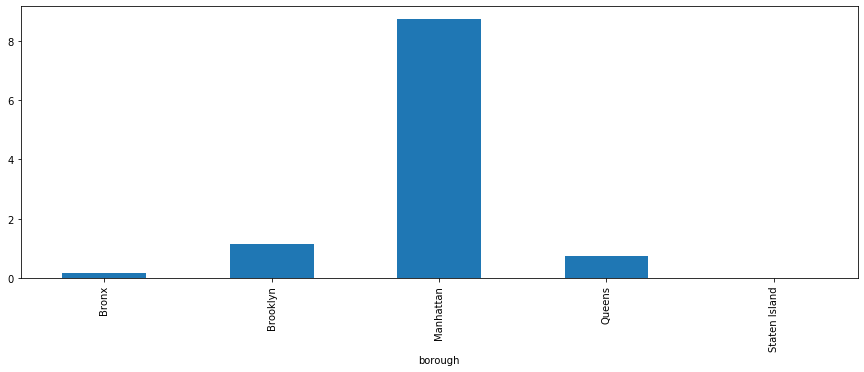

In [14]:
df = uber_bor.join(demographics, how='inner')[['num_trips', 'population']]
df['trips_per_person'] = df['num_trips']/ df['population']
df['trips_per_person'].plot.bar(figsize=(15,5))

# Taxi

In [23]:
taxi = pd.read_sql('taxi_trips',
                   engine.connect(),
                   parse_dates='pickup_datetime',
                   columns=['pickup_datetime', 'borough', 'type'])

taxi['pickup_datetime'] = pd.to_datetime(taxi['pickup_datetime'])
taxi['month_year'] = pd.to_datetime(taxi['pickup_datetime']).dt.to_period('M')
taxi['pickup_hour'] = taxi['pickup_datetime'].dt.hour
taxi['pickup_weekday'] = taxi['pickup_datetime'].dt.weekday
taxi.set_index('pickup_datetime', inplace=True)

taxi.head()

,borough,type,month_year,pickup_hour,pickup_weekday
pickup_datetime,,,,,
2014-04-04 08:22:40,Brooklyn,Y,2014-04,8,4
2014-06-21 19:02:00,Manhattan,Y,2014-06,19,5
2014-06-04 20:49:50,Manhattan,Y,2014-06,20,2
2014-05-16 14:20:49,Manhattan,Y,2014-05,14,4
2014-04-27 13:55:20,Manhattan,Y,2014-04,13,6


In [24]:
taxi.head()

,borough,type,month_year,pickup_hour,pickup_weekday
pickup_datetime,,,,,
2014-04-04 08:22:40,Brooklyn,Y,2014-04,8,4
2014-06-21 19:02:00,Manhattan,Y,2014-06,19,5
2014-06-04 20:49:50,Manhattan,Y,2014-06,20,2
2014-05-16 14:20:49,Manhattan,Y,2014-05,14,4
2014-04-27 13:55:20,Manhattan,Y,2014-04,13,6


In [25]:
bad_trips = taxi[taxi['borough'] == 'Does not belong to any borough'].shape[0]
bad_trips_pct = bad_trips / taxi.shape[0]
taxi = taxi[taxi['borough'] != 'Does not belong to any borough']


print(f'There are {bad_trips} trips that does not belong to any borough. That is the {100* bad_trips_pct:.2f}%. \
We will ignore them.')

There are 182439 trips that does not belong to any borough. That is the 1.58%. We will ignore them.


In [29]:
taxi_g = pd.DataFrame(taxi[taxi['type'] == 'G'].groupby(['borough', 'month_year']).count()['pickup_hour'])
taxi_g.rename(columns={'pickup_hour': 'num_trips'}, inplace=True)
taxi_g.reset_index(inplace=True)
# Multiply by a factor to get the real value
taxi_g['num_trips'] = taxi_g['num_trips'] * 5
taxi_g.head()

,borough,month_year,num_trips
0,Bronx,2014-04,129555
1,Bronx,2014-05,121265
2,Bronx,2014-06,107765
3,Bronx,2014-07,99510
4,Bronx,2014-08,99305


In [30]:
taxi_y = pd.DataFrame(taxi[taxi['type'] == 'Y'].groupby(['borough', 'month_year']).count()['pickup_hour'])
taxi_y.rename(columns={'pickup_hour': 'num_trips'}, inplace=True)
taxi_y.reset_index(inplace=True)
# Multiply by a factor to get the real value
taxi_y['num_trips'] = taxi_y['num_trips'] * 20
taxi_y.head()

,borough,month_year,num_trips
0,Bronx,2014-04,10100
1,Bronx,2014-05,10160
2,Bronx,2014-06,9400
3,Bronx,2014-07,8900
4,Bronx,2014-08,9700


In [35]:
taxi_final = pd.DataFrame(pd.concat([taxi_g, taxi_y]).groupby(['borough', 'month_year']).sum()['num_trips'])
taxi_final.reset_index(inplace=True)
taxi_final.head()

,borough,month_year,num_trips
0,Bronx,2014-04,139655
1,Bronx,2014-05,131425
2,Bronx,2014-06,117165
3,Bronx,2014-07,108410
4,Bronx,2014-08,109005


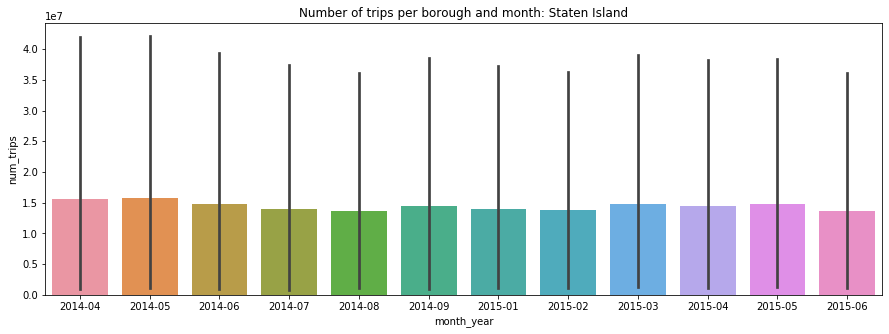

In [42]:
fig, ax = plt.subplots(figsize=(15,5), )
sns.barplot(x='month_year', y='num_trips', data=taxi_final, ax = ax, estimator=sum)
plt.title(f'Number of trips per borough and month: {bor}')
plt.show()